In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('finviz_screener.xlsx', index_col='Ticker')

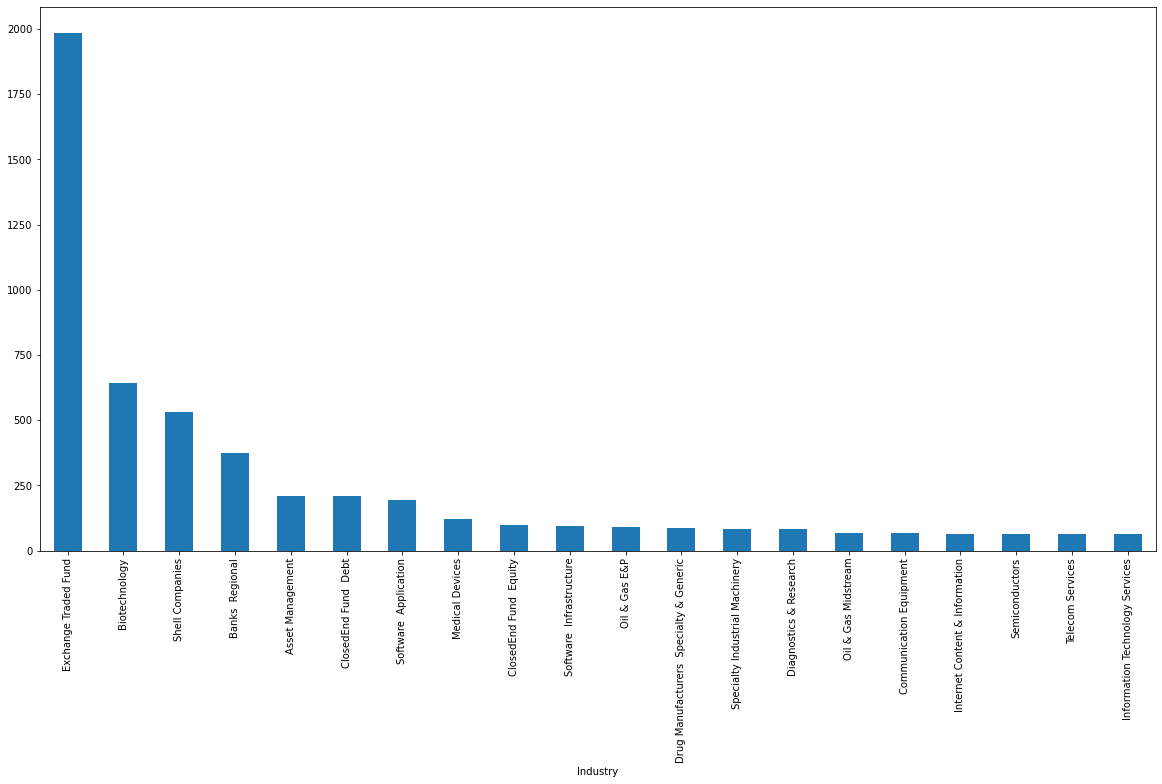

In [3]:
df.groupby('Industry')['Company'].count().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(20,10))

## Dataframe comparativo PER vs PER de la industria

In [4]:
data = pd.DataFrame()
data['PER'] = df['P/E']
data['PER.I'] = df.groupby('Industry').mean().loc[df['Industry']]['P/E'].values
data['PER/PER.I'] = data['PER'] / data['PER.I']
data['MarketCap'] = df['MarketCap']

## Filtro de empresas donde su PER individual sea menos de la mitad que el PER de la industria y con una capitalización de más de 100 Billones

In [5]:
sub = data[(data['PER']/data['PER.I']<0.5) & (data['PER']!=0) & (data['MarketCap']>100000000000)].sort_values('PER/PER.I')

In [6]:
sub

,PER,PER.I,PER/PER.I,MarketCap
Ticker,,,,
PM,17.08,278.762857,0.061271,1.342900e+11
INTC,13.06,172.015385,0.075923,2.507400e+11
SNY,8.57,103.120667,0.083107,1.229500e+11
TM,15.55,169.928750,0.091509,2.460800e+11
BRKA,14.11,127.367500,0.110782,5.816400e+11
QCOM,23.53,172.015385,0.136790,1.498100e+11
LOW,24.73,164.296667,0.150520,1.326100e+11
HD,25.77,164.296667,0.156850,3.242300e+11
LMT,15.15,96.164839,0.157542,1.029300e+11


In [7]:
#industrySize = df.groupby(['Industry'])['Company'].count()
#sub.loc[[i for i in sub.index if industrySize.loc[df.loc[i]['Industry']]>50]]

## Seleccionadas

In [8]:
df.loc[['VZ', 'T', 'TMUS', 'GILT', 'SWKS', 'QCOM', 'MDB', 'HZO', 'INTC', 'AMD',  'RIO']]

,Company,Sector,Industry,Country,MarketCap,P/E,Dividend,ROE,ROI,Debt/Eq,Price
Ticker,,,,,,,,,,,
VZ,Verizon Communications Inc.,Communication Services,Telecom Services,USA,2.379400e+11,13.56,0.0431,0.278,0.109,1.90,58.30
T,AT&T Inc.,Communication Services,Telecom Services,USA,2.156600e+11,NaN,0.0683,0.031,0.017,0.97,30.47
TMUS,"TMobile US, Inc.",Communication Services,Telecom Services,USA,1.592800e+11,50.45,NaN,0.055,0.041,1.17,127.65
GILT,Gilat Satellite Networks Ltd.,Technology,Communication Equipment,Israel,6.136700e+08,17.29,0.0919,0.149,0.155,0.02,10.77
SWKS,"Skyworks Solutions, Inc.",Technology,Semiconductors,USA,2.924000e+10,29.59,0.0107,0.252,0.196,0.00,187.70
QCOM,QUALCOMM Incorporated,Technology,Semiconductors,USA,1.498100e+11,23.53,0.0189,1.359,0.243,2.13,137.79
MDB,"MongoDB, Inc.",Technology,Software Infrastructure,USA,1.822000e+10,NaN,NaN,8.048,0.214,NaN,290.33
HZO,"MarineMax, Inc.",Consumer Cyclical,Specialty Retail,USA,1.080000e+09,12.52,NaN,0.204,0.138,0.45,49.89
INTC,Intel Corporation,Technology,Semiconductors,USA,2.507400e+11,13.06,0.0215,0.266,0.166,0.45,64.55


In [9]:
#df[df['Industry'] == 'Medical Instruments & Supplies'].sort_values('P/E').iloc[:20]